# Student Performance Indicator
## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysi
* Data Pre-Processing
* Model Training
* Choose best model


## 1) Problem statement
* This project aims to understand how the student's performance (exam scores) is affected by other variables such as hours studied, classes attended, parental involvement, availability of educational resources, participation in extracurricular activities, average number of hours of sleep per night, scores from previous exams, student's level of motivation, availability of internet access, number of tutoring sessions attended per month, family income level (Low, Medium, High), quality of the teachers (Low, Medium, High), school type (Public, Private), influence of peers on academic performance (Positive, Neutral, Negative), average number of hours of physical activity per week, presence of learning disabilities, parental education level, distance from home to school (Near, Moderate, Far), gender, and exam score.

## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
* The data consists of 20 column and 6607 rows.

## 2.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('student performances.csv')

## Show Top 5 Records

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Shape of the dataset

In [4]:
df.shape

(6607, 20)

## 3.Data validation steps

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

## 3.1 Checking Missing values

In [5]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

## Observation:
* There is null value present in the three column "Teacher_Quality","Parental_Education_Level" and "Distance_from_Home".

## Checking the percentage of null values :

In [6]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


## Observation:
* The three column "Teacher_Quality","Parental_Education_Level" and "Distance_from_Home" contain not more than 2% of null values.

## Handling Missing data and Null values:

## 1.Teacher_Quality

In [7]:
print(df["Teacher_Quality"].unique())
print(f"Total number of unique values: {df['Teacher_Quality'].nunique()} ")
percentage_null_Teacher_Quality = round((df["Teacher_Quality"].isnull().mean()) * 100, 2)
print(f'Percentage of Null values in the "Teacher_Quality" column: {percentage_null_Teacher_Quality}%')
print(df['Teacher_Quality'].value_counts())
print(df['Teacher_Quality'].info())

['Medium' 'High' 'Low' nan]
Total number of unique values: 3 
Percentage of Null values in the "Teacher_Quality" column: 1.18%
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Teacher_Quality
Non-Null Count  Dtype 
--------------  ----- 
6529 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


### Using Mode Imputation Technique to remove null and missing values in "Teacher_Quality" column.

In [8]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

In [9]:
print(df['Teacher_Quality'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Teacher_Quality
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


## 2.Parental_Education_Level

In [10]:
print(df["Parental_Education_Level"].unique())
print(f"Total number of unique values: {df['Parental_Education_Level'].nunique()} ")
percentage_null_Parental_Education_Level = round((df["Parental_Education_Level"].isnull().mean()) * 100, 2)
print(f'Percentage of Null values in the "Parental_Education_Level" column: {percentage_null_Parental_Education_Level}%')
print(df['Parental_Education_Level'].value_counts())
print(df['Parental_Education_Level'].info())

['High School' 'College' 'Postgraduate' nan]
Total number of unique values: 3 
Percentage of Null values in the "Parental_Education_Level" column: 1.36%
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Parental_Education_Level
Non-Null Count  Dtype 
--------------  ----- 
6517 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


### Using Mode Imputation Technique to remove null and missing values in "Parental_Education_Level" column.

In [11]:
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

In [12]:
print(df['Parental_Education_Level'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Parental_Education_Level
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


## 3.Distance_from_Home

In [13]:
print(df["Distance_from_Home"].unique())
print(f"Total number of unique values: {df['Distance_from_Home'].nunique()} ")
percentage_null_Distance_from_Home = round((df["Distance_from_Home"].isnull().mean()) * 100, 2)
print(f'Percentage of Null values in the "Distance_from_Home" column: {percentage_null_Distance_from_Home}%')
print(df['Distance_from_Home'].value_counts())
print(df['Distance_from_Home'].info())

['Near' 'Moderate' 'Far' nan]
Total number of unique values: 3 
Percentage of Null values in the "Distance_from_Home" column: 1.01%
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Distance_from_Home
Non-Null Count  Dtype 
--------------  ----- 
6540 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


### Using Mode Imputation Technique to remove null and missing values in "Distance_from_Home" column.

In [14]:
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [15]:
print(df['Distance_from_Home'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Distance_from_Home
Non-Null Count  Dtype 
--------------  ----- 
6607 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None


## 3.1 Checking Missing values

In [16]:
df.duplicated().sum()

0

## There are no duplicate value present in the dataset.

## 3.3 Checking data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## 3.4 Checking the number of unique values of each column

In [18]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

## 3.5 Checking statistics of data set

In [19]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Insight
* Hours Studied: On average, students study around 20 hours, with a minimum of 1 and a maximum of 44 hours. Most students fall between 16 and 24 hours.
* Attendance: The average attendance is about 80%, with students attending between 60% and 100% of their classes. Half of the students have attendance above 80%.
* Sleep Hours: Students generally get around 7 hours of sleep per night, with most sleeping between 6 and 8 hours. The minimum is 4 hours, while the maximum is 10 hours.
* Previous Scores: The average score from previous exams is 75, with a broad range from 50 to 100. Half of the students have scores between 63 and 88.
* Tutoring Sessions: Most students attend about 1 to 2 tutoring sessions per month, but the range is wide, from 0 to 8 sessions, indicating variability in tutoring access.
* Physical Activity: On average, students engage in around 3 hours of physical activity per week, with a range from no activity to 6 hours.
* Exam Score: The average exam score is 67, with the majority of students scoring between 65 and 69. The maximum score slightly exceeds 100, suggesting a possible outlier or grading anomaly.

## 3.7 Exploring Data

In [20]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

We have 13 categorical features : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [22]:
print("Categories in 'Parental_Involvement' variable:     ",end=" " )
print(df['Parental_Involvement'].unique())

print("Categories in 'Access_to_Resources' variable:  ",end=" ")
print(df['Access_to_Resources'].unique())

print("Categories in'Extracurricular_Activities' variable:",end=" " )
print(df['Extracurricular_Activities'].unique())

print("Categories in 'Motivation_Level' variable:     ",end=" " )
print(df['Motivation_Level'].unique())

print("Categories in 'Internet_Access' variable:     ",end=" " )
print(df['Internet_Access'].unique())

print("Categories in 'Family_Income' variable:     ",end=" " )
print(df['Family_Income'].unique())

print("Categories in 'Teacher_Quality' variable:     ",end=" " )
print(df['Teacher_Quality'].unique())

print("Categories in 'School_Type' variable:     ",end=" " )
print(df['School_Type'].unique())

print("Categories in 'Peer_Influence' variable:     ",end=" " )
print(df['Peer_Influence'].unique())

print("Categories in 'Peer_Influence' variable:     ",end=" " )
print(df['Peer_Influence'].unique())

print("Categories in 'Parental_Education_Level' variable:     ",end=" " )
print(df['Parental_Education_Level'].unique())

print("Categories in 'Distance_from_Home' variable:     ",end=" " )
print(df['Distance_from_Home'].unique())


print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'Parental_Involvement' variable:      ['Low' 'Medium' 'High']
Categories in 'Access_to_Resources' variable:   ['High' 'Medium' 'Low']
Categories in'Extracurricular_Activities' variable: ['No' 'Yes']
Categories in 'Motivation_Level' variable:      ['Low' 'Medium' 'High']
Categories in 'Internet_Access' variable:      ['Yes' 'No']
Categories in 'Family_Income' variable:      ['Low' 'Medium' 'High']
Categories in 'Teacher_Quality' variable:      ['Medium' 'High' 'Low']
Categories in 'School_Type' variable:      ['Public' 'Private']
Categories in 'Peer_Influence' variable:      ['Positive' 'Negative' 'Neutral']
Categories in 'Peer_Influence' variable:      ['Positive' 'Negative' 'Neutral']
Categories in 'Parental_Education_Level' variable:      ['High School' 'College' 'Postgraduate']
Categories in 'Distance_from_Home' variable:      ['Near' 'Moderate' 'Far']
Categories in 'Gender' variable:      ['Male' 'Female']


## 3.8 Adding columns for "Total Score" and "Average"

In [23]:
df['total score'] = df['Previous_Scores'] + df['Exam_Score']
df['average'] = df['total score']/2
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,total score,average
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,High School,Near,Male,67,140,70.0
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,College,Moderate,Female,61,120,60.0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Postgraduate,Near,Male,74,165,82.5
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,High School,Moderate,Male,71,169,84.5
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,College,Near,Female,70,135,67.5


In [24]:
Previous_full_scored = df[df['Previous_Scores'] == 100]['average'].count()
Recent_exam_full_scores = df[df['Exam_Score'] == 100]['average'].count()

print(f'Number of students who scored full marks in Previous_exam: {Previous_full_scored}')
print(f'Number of students who scored full marks in Recent_exam: {Recent_exam_full_scores}')

Number of students who scored full marks in Previous_exam: 69
Number of students who scored full marks in Recent_exam: 1


## Insight
* The code calculates how many students scored 100 in their previous exam (Previous_Scores == 100).This value helps identify the number of top performers from earlier assessments.
* It also counts the students who scored a perfect 100 in their recent exam (Exam_Score == 100).This reflects how many students reached the top score in the latest exam.
* Comparing these two results helps assess trends in student performance. If more students scored 100 in the recent exam, it could indicate improvement. Fewer students achieving full marks might suggest increased difficulty or decreased performance.

In [25]:
Previous_less_scored = df[df['Previous_Scores'] <= 60]['average'].count()
Recent_exam_less_scores = df[df['Exam_Score'] <= 60]['average'].count()

print(f'Number of students who scored less marks in Previous_exam: {Previous_less_scored}')
print(f'Number of students who scored less marks in Recent_exam: {Recent_exam_less_scores}')

Number of students who scored less marks in Previous_exam: 1356
Number of students who scored less marks in Recent_exam: 145


## Insight
* Previous_less_scored counts the number of students who scored 60 or below in their previous exam.This provides an indication of how many students struggled or performed below average in earlier assessments.
* Recent_exam_less_scores counts the number of students who scored 60 or below in their most recent exam.This helps identify students who are currently underperforming or still facing challenges in the recent assessment.

<Axes: >

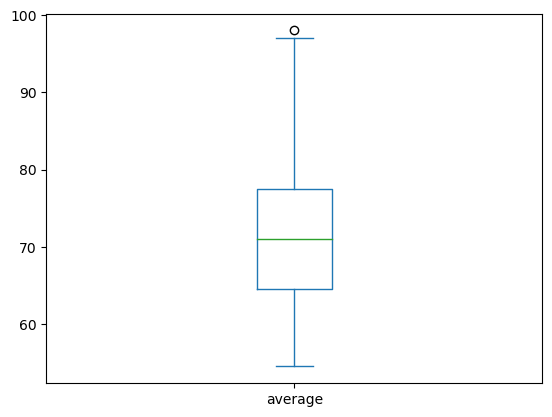

In [26]:
df['average'].plot(kind='box')

## Insight
* The box plot of the 'average' score shows the distribution of the average scores of students in both previous and recent exams.
* The median average score is around 70, indicating that half of the students have an average score below 70 and half have an average score above 70.


In [27]:
df['average'].describe()

count    6607.000000
mean       71.153095
std         7.779876
min        54.500000
25%        64.500000
50%        71.000000
75%        77.500000
max        98.000000
Name: average, dtype: float64

In [28]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,total score,average
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,High School,Near,Male,67,140,70.0
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,College,Moderate,Female,61,120,60.0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Postgraduate,Near,Male,74,165,82.5
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,High School,Moderate,Male,71,169,84.5
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,College,Near,Female,70,135,67.5


## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

Gender
Male      3814
Female    2793
Name: count, dtype: int64


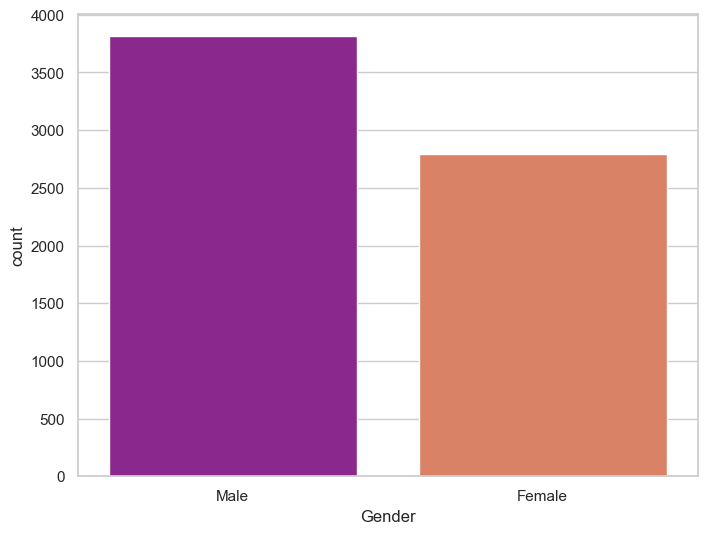

In [54]:
plt.figure(figsize=(8, 6))
print(df['Gender'].value_counts())
sns.countplot(data=df, x='Gender',palette='plasma')
plt.show()

## Insight
* Male student have higher count than female student.
* Out of 6607 students,3814 are male.
* Out of 6607 students,2793 are female.
* This count plot shows that there are more male student as compare to feamle student.

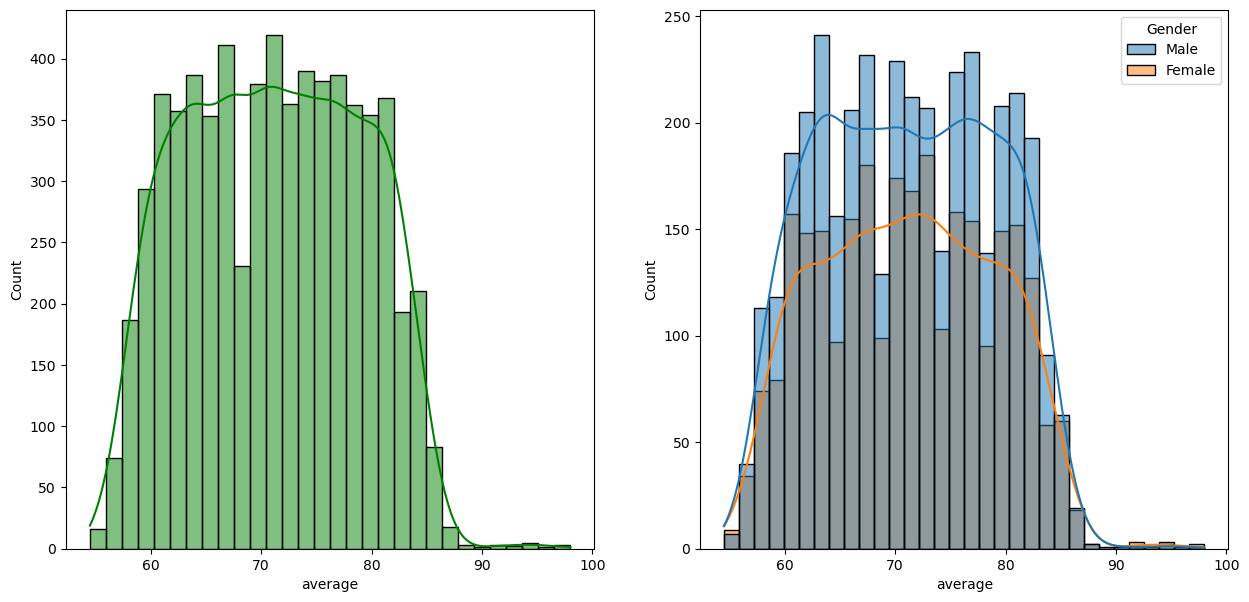

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

## Insight
* The histograms show the distribution of average scores for the entire dataset at (left) and separated by gender at (right).
* The right histogram helps us compare the average score distribution between male and female students.
* Out of 6607 student , most of the students has an average between 60-80 based on the right histogram distribution.
* Female student tend to perform well then male student. 

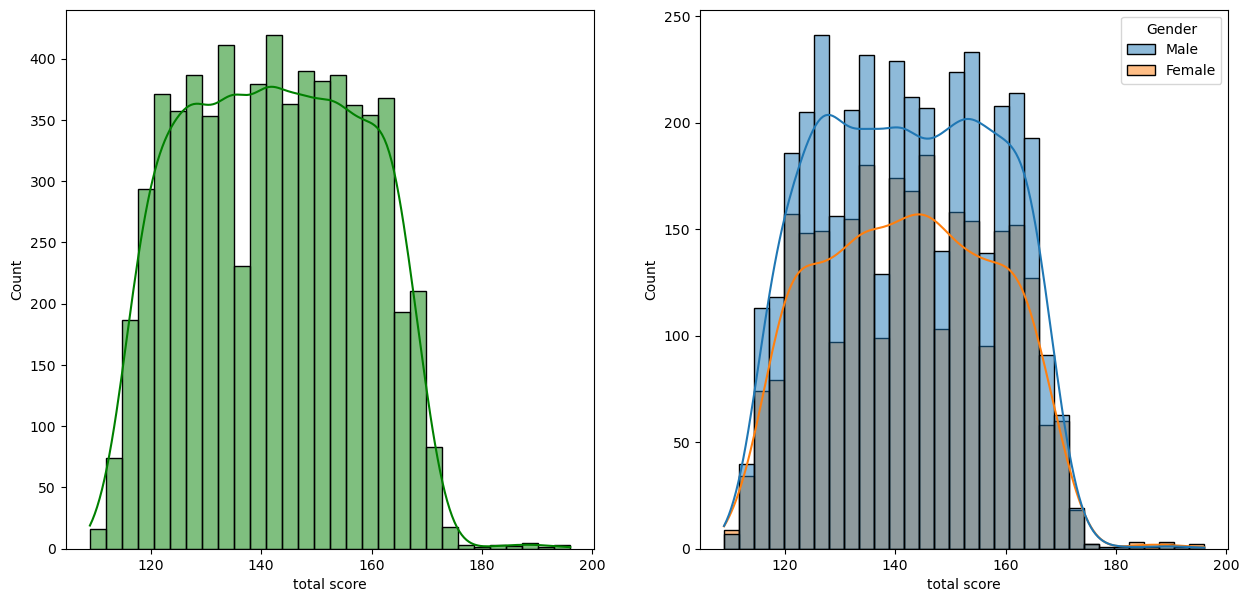

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='Gender')
plt.show()

## Insight
* The histograms show the distribution of total scores for the entire dataset at (left) and separated by gender at (right).
* The right histogram helps us compare the total score distribution between male and female students.
* Out of 6607 student , most students has total score between 120-150 based on the right histogram.
* Male student has slightly less total_score distribution in the right histogram then the Female student.It could suggest that male students, on average, perform better in the exams than female student.

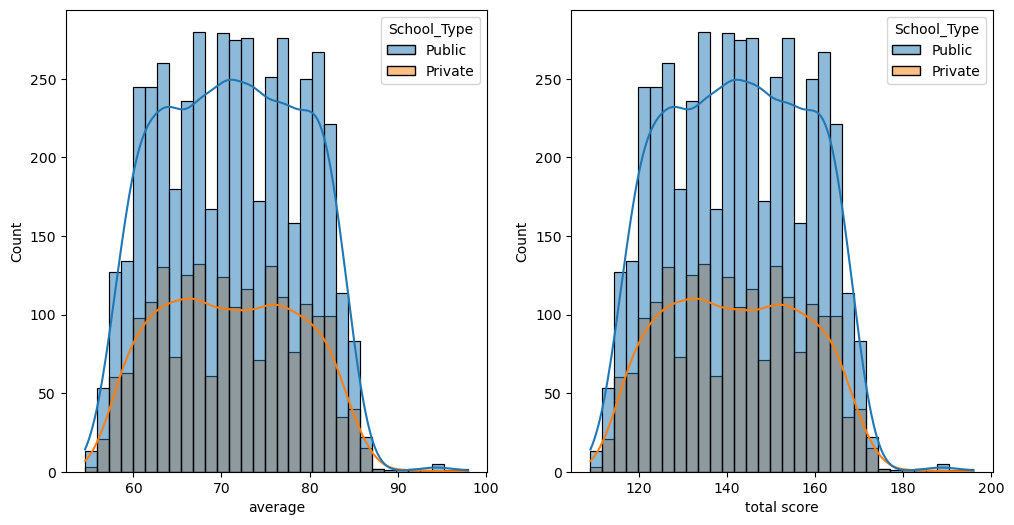

In [37]:
plt.subplots(1,1,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='School_Type')
plt.subplot(142)
sns.histplot(data=df,x='total score',kde=True,hue='School_Type')
plt.show()

## Insight
* The histogram shows the distribution of average scores and total score for the entire dataset, separated by school type.
* Both average score and total score shows same type of distribution in right and left histogram.
* 'Public school' has lesser peak at higher average and total score while 'Private school' has higher peak at higher average and total score.It suggest that students from public schools, on average, perform better in the exams.

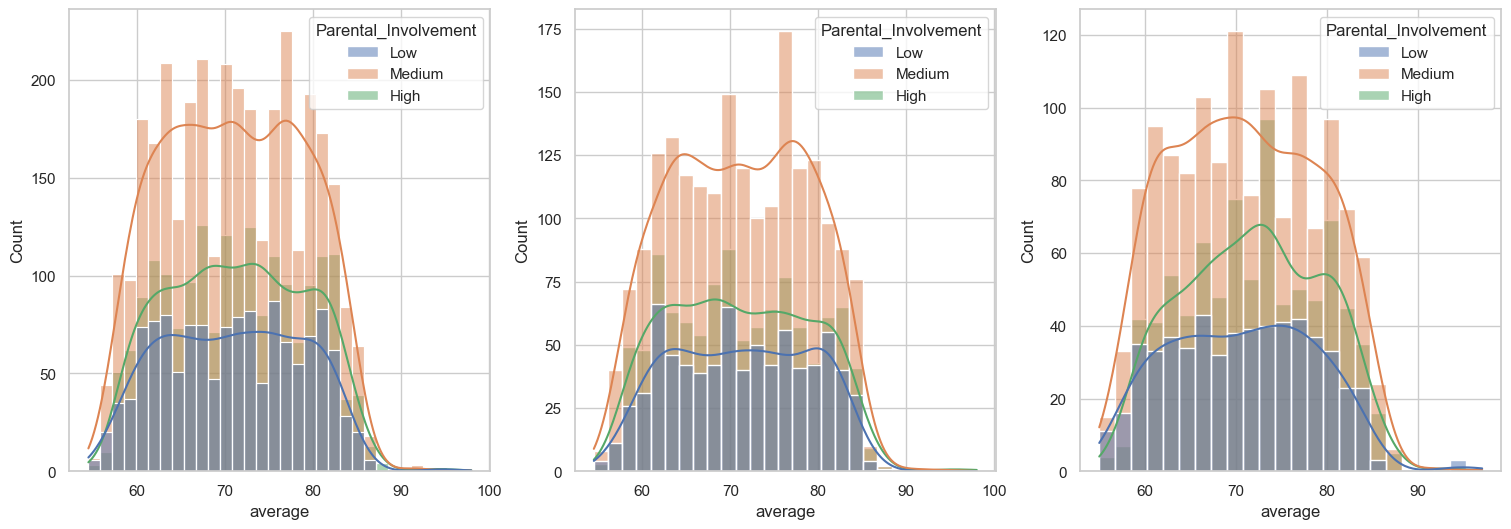

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Parental_Involvement')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Parental_Involvement')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Parental_Involvement')
plt.show()

## Insight
* Students with higher levels of parental involvement tend to have significantly higher average scores compared to those with lower levels of involvement.
* Male student with involved parents tend to score much higher than male student with less involved parents.
* Female student average does not seem to change as much when their parents are more or less involved.

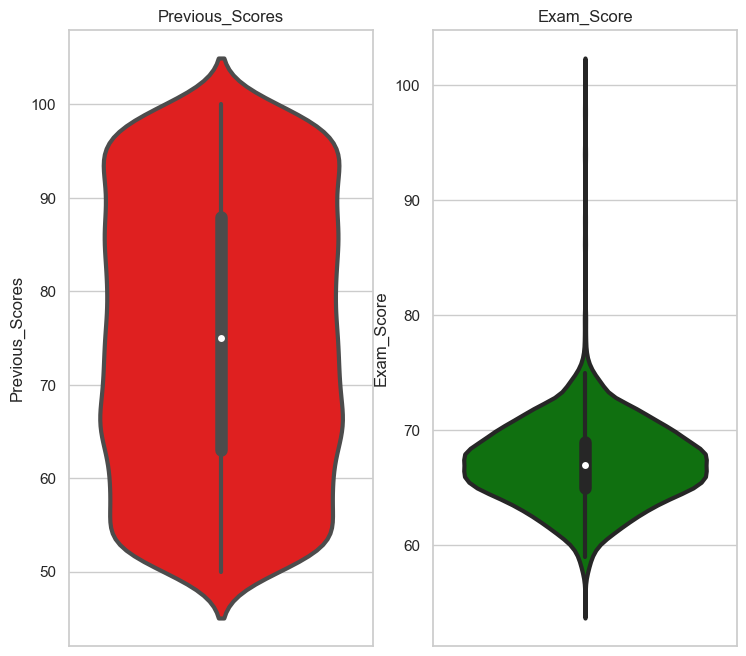

In [59]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Previous_Scores')
sns.violinplot(y='Previous_Scores',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Exam_Score')
sns.violinplot(y='Exam_Score',data=df,color='green',linewidth=3)
plt.show()

## Insight
* The median of previous score is slightly higher than the median of recent exam score. This suggests that students tend to perform better in their previous assessments compared to the final exam.
* Both plots show outliers, particularly in the lower range for exam scores. These outliers represents students who performed significantly worse on the recent exam compared to their previous exam.The presence of outliers, especially in the lower range for exam scores, suggests that some students faced significant challenges in the exam.

## Conclusion
* Students generally scored better in their previous assessments than on the final exam.
* Most students performed consistently with their previous scores, showing stable performance overall.
* Exam scores had a greater range, indicating that students’ performance varied significantly on the final exam.
